In [1]:
import pandas as pd
import numpy as np

In [2]:
#df= pd.read_csv('feature_vectors_syscalls_frequency_5_Cat.csv')
df=pd.read_csv('feature_vectors_syscallsbinders_frequency_5_Cat.csv')
#df2=df2.drop(columns=['Class'])
for i in range(0,11598):
    if int(df.at[i,'Class'])<5:
        df.at[i,'Class']=1
    else:
        df.at[i,'Class']=0
#df = pd.concat([df, df2], axis=1)

In [3]:
X=df.loc[:, df.columns != 'Class']


In [4]:
Y=df.loc[:,'Class']


In [5]:
import tracemalloc
import os
import psutil
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
k=df[df.columns[1:]].corr()['Class'][:]
c=1
indexl=[]
for x in k:
    c=c+1
    if abs(x)<0.037:
        #print(c)
        indexl.append(c)
        #c=c+1
        #print(abs(x))

In [6]:
df.drop(df.columns[indexl], axis = 1, inplace=True)
X=df.loc[:, df.columns != 'Class']

In [7]:
folder='Shafin'

In [7]:
import tracemalloc
import os
import psutil
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix



In [8]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


In [9]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
import tracemalloc
import os
import psutil
 
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
a=0
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

tracemalloc.start()
    
start = time.process_time()
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rf', RandomForestClassifier()))
	level0.append(('lgb', lgb.LGBMClassifier()))
	level0.append(('etc', ExtraTreesClassifier()))
	level0.append(('bag', BaggingClassifier()))
	#level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	#model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	model = StackingClassifier(estimators=level0, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['rf'] = RandomForestClassifier()
	models['lgb'] = lgb.LGBMClassifier()
	models['etc'] =  ExtraTreesClassifier()
	models['bag'] = BaggingClassifier()
	#models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scoresp = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

>rf 0.9734 (0.0035)
>lgb 0.9767 (0.0036)
>etc 0.9696 (0.0037)
>bag 0.9705 (0.0043)
>stacking 0.9756 (0.0036)
time  7.265625
memory (12552200, 30268274)


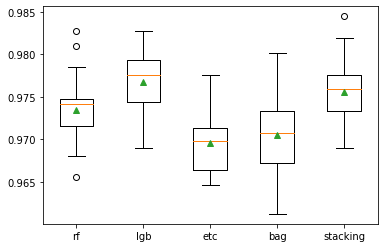

In [10]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()



for name, model in models.items():
    models = get_models()
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))


# plot model performance for comparison
print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [12]:

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scoresa = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores 

>rf 0.9769 (0.0035)
>lgb 0.9814 (0.0033)
>etc 0.9748 (0.0036)
>bag 0.9808 (0.0035)
>stacking 0.9784 (0.0033)
time  1.765625
memory (14706421, 32429205)


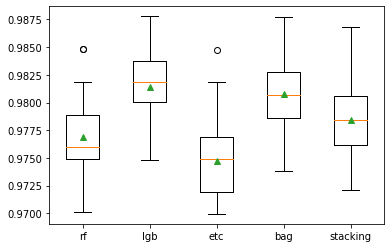

In [13]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [14]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    #scoresf = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

>rf 0.9924 (0.0023)
>lgb 0.9913 (0.0023)
>etc 0.9891 (0.0023)
>bag 0.9844 (0.0038)
>stacking 0.9934 (0.0023)
time  1.828125
memory (16127917, 33851214)


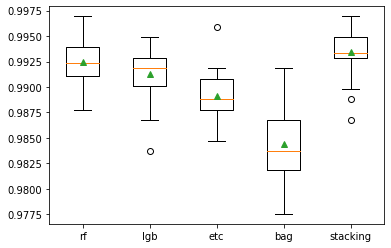

In [15]:

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [16]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise') 
    #scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
    #print('precision >%s %.4f (%.4f)' % (name, mean(scoresp), std(scoresp)))
    #scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
    #print('recall >%s %.4f (%.4f)' % (name, mean(scoresr), std(scoresr)))
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
    #print('f1 >%s %.4f (%.4f)' % (name, mean(scoresf), std(scoresf)))
    return scores

>rf 0.9847 (0.0022)
>lgb 0.9863 (0.0021)
>etc 0.9821 (0.0021)
>bag 0.9822 (0.0025)
>stacking 0.9857 (0.0020)
time  2.234375
memory (14986197, 33851214)


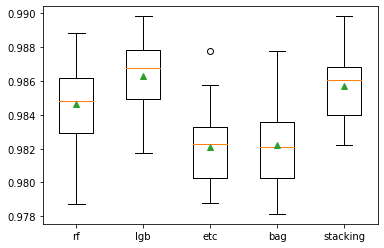

In [17]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
models = get_models()
# evaluate the models and store results
results, names = list(), list()

tracemalloc.start()
    
start = time.process_time()

for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

print('time ',time.process_time() - start)
print('memory',tracemalloc.get_traced_memory())
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

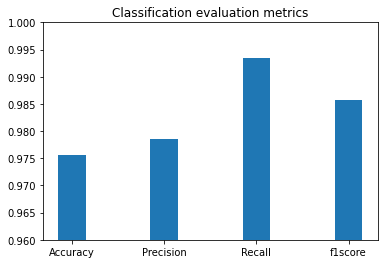

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt 
t = ['Accuracy','Precision','Recall','f1score']
x_axis = np.arange(len(t))
ind = np.arange(len(t))
width = 0.3
acc=[0.9756,0.9785,0.9935,0.9857]
plt.bar(ind, acc, width)
plt.ylim([0.96,1])
#add_value_label(ind,acc) 
plt.xticks(x_axis, t)
#plt.xticks(rotation=90)
#plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
# Add legend
#plt.xlabel("Test size")
#plt.ylabel("Memory consumption")
#plt.legend()
plt.title("Classification evaluation metrics")
# Display

plt.savefig('paper/shafin.png',facecolor=(1, 1, 1),dpi=200,bbox_inches = 'tight')